In [1]:
!pip install yfinance

In [35]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
import yfinance as yf

sb.set_theme()

# Default start & end dates (last 1 year)
DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(days=365))
DEFAULT_END   = dt.date.isoformat(dt.date.today())

# Stock Class Definition
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        """
        symbol : str
        start, end : ISO strings 'YYYY-MM-DD'
        """
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()

    def get_data(self):
        """
        Download historical stock price data using yfinance for the given symbol,
        start, and end dates. Store in a pandas DataFrame indexed by DatetimeIndex.
        """
        end_inclusive = (pd.to_datetime(self.end) + pd.Timedelta(days=1)).date().isoformat()

        df = yf.download(
            tickers=self.symbol,
            start=self.start,
            end=end_inclusive,
            progress=False
        )

        if df.empty:
            raise ValueError(f"No data returned for {self.symbol} between {self.start} and {self.end}.")

        df.index = pd.to_datetime(df.index).tz_localize(None).normalize()

        if "Adj Close" not in df.columns and "Close" in df.columns:
            df["Adj Close"] = df["Close"]
            
        self.calc_returns(df)

        return df

    def calc_returns(self, df):
        """Add 'change' and 'instant_return' columns to the DataFrame."""
        adj = df["Adj Close"].astype(float)
        df["change"] = adj.diff()
        df["instant_return"] = np.log(adj).diff().round(4)

    def plot_return_dist(self, bins=50):
        """Plot histogram of instantaneous (log) returns."""
        r = self.data["instant_return"].dropna()
        plt.figure(figsize=(9, 5))
        plt.hist(r, bins=bins, edgecolor="black")
        plt.title(f"{self.symbol} Daily Instantaneous Returns\n{self.start} → {self.end}")
        plt.xlabel("Instantaneous Return (log)")
        plt.ylabel("Frequency")
        plt.grid(alpha=0.3, linestyle="--")
        plt.tight_layout()
        plt.show()

    def plot_performance(self):
        """Plot percent gain/loss over the date range."""
        price = self.data["Adj Close"].astype(float)
        cumret = price / price.iloc[0] - 1.0  # 0.10 = +10%
        plt.figure(figsize=(10, 5))
        plt.plot(cumret.index, cumret.values, linewidth=2)
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        plt.title(f"{self.symbol} Total Return (Gain/Loss)\n{self.start} → {self.end}")
        plt.xlabel("Date")
        plt.ylabel("Total Return")
        plt.grid(alpha=0.3, linestyle="--")
        plt.tight_layout()
        plt.show()



C:\Users\tejas\AppData\Local\Temp\ipykernel_24164\153201082.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(


Price,Close,High,Low,Open,Volume,Adj Close,change,instant_return
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,
2024-10-07,163.673660,169.159645,163.414799,168.402962,14034700,163.673660,NaN,NaN
2024-10-08,164.977936,165.376202,163.593994,164.709108,11723900,164.977936,1.304276,0.0079
2024-10-09,162.349426,165.535478,160.417878,164.136602,19666400,162.349426,-2.628510,-0.0161
2024-10-10,162.468918,163.595001,160.935635,161.403588,12900500,162.468918,0.119492,0.0007
2024-10-11,163.803085,164.549817,161.791884,162.618268,10946000,163.803085,1.334167,0.0082


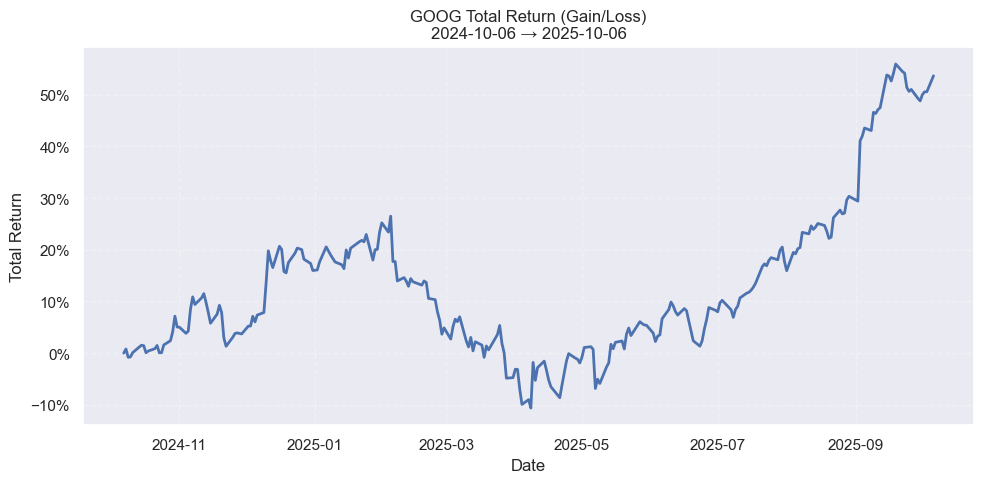

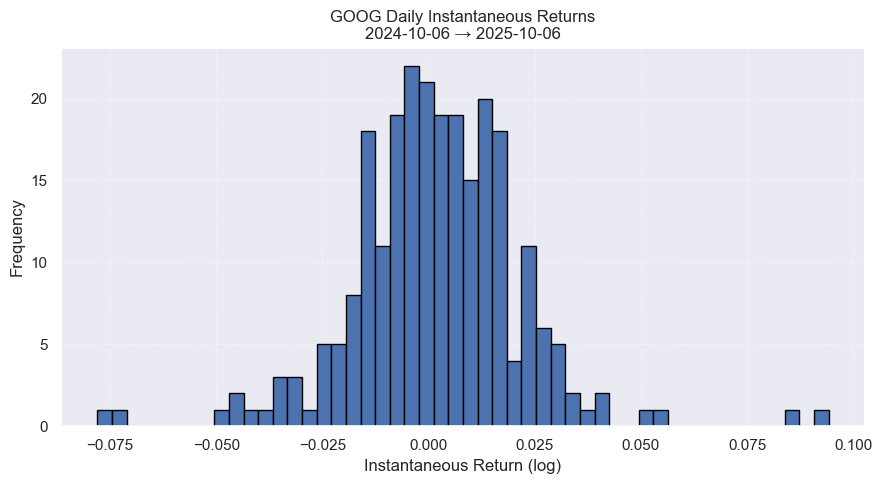

In [33]:

test = Stock(symbol="GOOG")  
display(test.data.head())       
test.plot_performance()       
test.plot_return_dist()         
